# Model Selection Using Evaluation Metrics

### Cross-Validation Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import SCORERS


In [2]:
digits = load_digits()
X, y = digits.data, digits.target == 1
# number 1 is True as positive class and other numbers False as negative class

clf = SVC(kernel= 'linear', C = 1)
print('Accuracy:', cross_val_score(clf, X, y, scoring = 'accuracy', cv = 5))
print('AUC:', cross_val_score(clf, X, y, scoring='roc_auc', cv=5))
print('recall:', cross_val_score(clf, X, y, scoring='recall', cv = 5))
print('==================')
clf = SVC(kernel= 'rbf', C = 1, gamma=0.01)
print('Accuracy:', cross_val_score(clf, X, y, scoring = 'accuracy', cv = 5))
print('AUC:', cross_val_score(clf, X, y, scoring='roc_auc', cv=5))
print('recall:', cross_val_score(clf, X, y, scoring='recall', cv = 5))


Accuracy: [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
AUC: [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
recall: [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]
Accuracy: [0.90277778 0.89722222 0.91643454 0.93593315 0.91643454]
AUC: [0.98903857 0.99891222 0.99957    0.99785002 0.999656  ]
recall: [0.05405405 0.         0.16666667 0.36111111 0.16666667]


In [3]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

### Grid Search Example

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import roc_auc_score


digits = load_digits()
X, y = digits.data, digits.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 )
clf = SVC(kernel='rbf')
grid_param = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Default metric to optimize over the grid parameter is accuracy
grid_search_accuracy = GridSearchCV(clf, param_grid=grid_param)
grid_search_accuracy.fit(X_train, y_train)
print('Best parameter:', grid_search_accuracy.best_params_)
print('Best score:', grid_search_accuracy.best_score_)

# Metric to optimise over grid parameter is AUC here
grid_search_auc = GridSearchCV(clf, param_grid= grid_param, scoring='roc_auc')
grid_search_auc.fit(X_train, y_train)
print('Best parameter:', grid_search_auc.best_params_)
print('Best score:', grid_search_auc.best_score_.round(2))


Best parameter: {'gamma': 0.001}
Best score: 0.9985157648354676
Best parameter: {'gamma': 0.001}
Best score: 1.0


### Two-feature classification example

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
import numpy as np

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

jitter_delta = 0.25
X_twovar_train = X_train[:, [20, 59]] + np.random.rand(X_train.shape[0], 2) + jitter_delta
X_twovar_test = X_test[:, [20, 59]] + np.random.rand(X_test.shape[0], 2) + jitter_delta

Best accuracy: {'class_weight': {1: 2}}


<IPython.core.display.Javascript object>


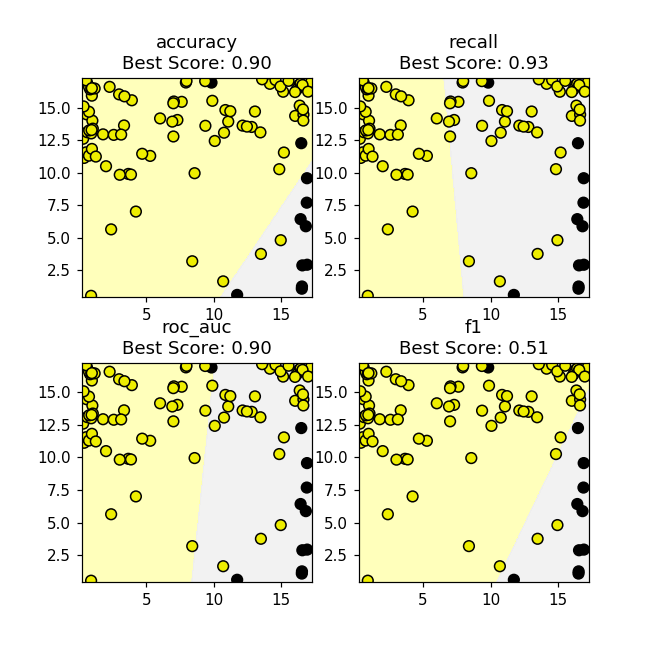

Best class_weight:  {'class_weight': {1: 2}} Best score:  0.9012620638455827 Scoring method:  accuracy
Best class_weight:  {'class_weight': {1: 50}} Best score:  0.9281529448041935 Scoring method:  recall
Best class_weight:  {'class_weight': {1: 20}} Best score:  0.895584285471411 Scoring method:  roc_auc
Best class_weight:  {'class_weight': {1: 3}} Best score:  0.5127720874865919 Scoring method:  f1


In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
grid_parm = {'class_weight': ['balanced', {1:2}, {1:3}, {1:4}, {1:5}, {1:10}, {1:20}, {1:50}]}
clf = SVC(kernel='linear')
grid_search = GridSearchCV(clf, param_grid=grid_parm, scoring='accuracy', cv = 3)
grid_search.fit(X_twovar_train, y_train)
print('Best accuracy:', grid_search.best_params_)

fig, subaxes = plt.subplots(2,2, figsize = (6, 6))
scoring_method = ['accuracy', 'recall', 'roc_auc', 'f1']
for method, i, j in  zip(scoring_method, [0, 0, 1, 1], [0, 1, 0, 1]):
    grid_search = GridSearchCV(clf, param_grid=grid_parm, scoring=method, cv = 3)
    grid_search.fit(X_twovar_train, y_train)
    print('Best class_weight: ', grid_search.best_params_ ,
          'Best score: ', grid_search.best_score_, 'Scoring method: ', method)
    plot_class_regions_for_classifier_subplot(grid_search, X_twovar_test[:100, :], y_test[: 100], None, None, None, subaxes[i, j])
    subaxes[i, j].set_title(method + '\n' + 'Best Score: {:.2f}'.format(grid_search.best_score_))
plt.subplots_adjust(hspace=0.3)    

<IPython.core.display.Javascript object>


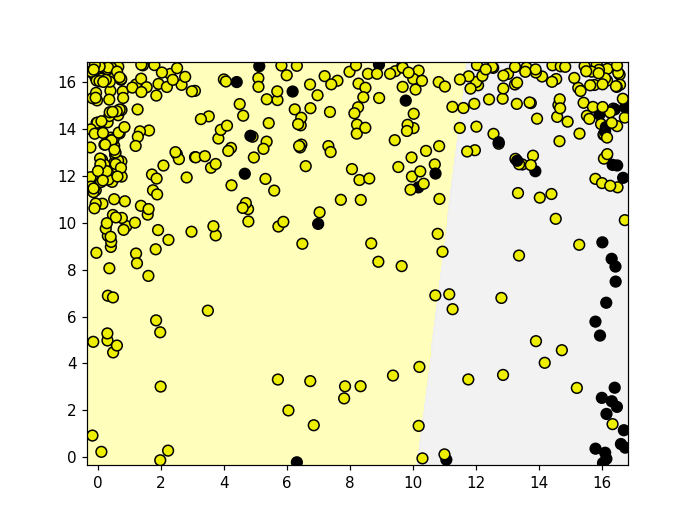

<IPython.core.display.Javascript object>


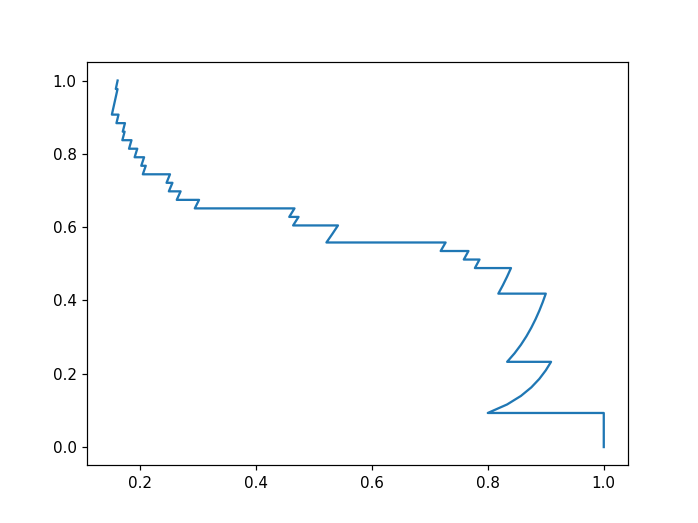

In [7]:
%matplotlib notebook
from sklearn.metrics import precision_recall_curve, accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC
import numpy as np

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

jitter_delta = 0.25
X_twovar_train = X_train[:, [20, 59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test = X_test[:, [20, 59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_score = clf.decision_function(X_twovar_test)
precision, recall, threshold = precision_recall_curve(y_test, y_score)

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)

plt.figure()
plt.plot(precision, recall)
